# Курс "Программирование на языке Python. Уровень 4. Анализ и визуализация данных на языке Python. Библиотеки numpy, pandas, matplotlib"

## Модуль 6. Агрегирование и групповые операции в pandas

1. Горизонтальное "раскатывание" и "штабелирование" данных
1. Группировка данных
2. Агрегирование данных
3. Групповые операции над данными
4. Групповые операции и статистический анализ
5. Сводные таблицы
6. Визуализация данных средствами pandas
7. Сохранение данных



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 10.0)
%matplotlib inline

### "Раскатывание" и "штабелирование" данных

Работа со сложным индексм: функции ```stack()``` и ```unstack()```.

In [2]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


 Функция ```stack()``` "сложит" данные вертикально, построив "сложный индекс":

In [3]:
stacked = data.stack()
stacked

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

Функция ```unstack()``` выполнит противоположную задачу - данные из "сложного индекса" вынесет, "раскатает" в колонки:

In [4]:
stacked.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


#### Функции melt() и pivot()

```melt()``` - преобразует столбцы в строки, добавляя соотвествующие столбцы variable и value. \
```pivot()```- наоборот, собирает данные по строкам в столбцы

In [5]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [6]:
melted = pd.melt(df, ['key'], var_name='letters', value_name='numbers')
melted

,key,letters,numbers
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [7]:
reshaped = pd.pivot(melted, index=['key'], columns=['letters'], values='numbers')
reshaped

letters,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


__ПРАКТИКА__

Загрузите датасет "toy_budget.xlsx". Он содержит информацию по доходам и расходам подразделений компании по месяцам. Преобразуйте его в датасет, в котором месяцы отложены как столбцы и упорядочены так, как это задано в списке ```months```. 

Указание: используйте функцию ```reindex()``` для упорядочивания колонок.

In [18]:
months = ['apr',
 'may',
 'jun',
 'jul',
 'aug',
 'sep',
 'oct',
 'nov',
 'dec',
 'jan',
 'feb',
 'mar',]

df_toy_budget = pd.read_excel( 'data/toy_budget.xlsx', engine='openpyxl' )
df_toy_budget
# !pip install openpyxl


,Div,Account,Type,Month,Amount
0,IT,System Costs,Cost,apr,364.68
1,IT,IT Support,Cost,apr,62.27
2,Finance,Accounting,Cost,apr,78.89
3,Finance,Billing,Cost,apr,55.81
4,Adm,Office Adm,Cost,apr,88.94
...,...,...,...,...,...
103,Adm,Office Adm,Cost,mar,88.94
104,Air,Gross Margin,Income,mar,1055.67
105,Truck,Gross Margin,Income,mar,931.48
106,Rail,Gross Margin,Income,mar,919.21


In [17]:
# ваш код здесь

df_toy_budget_melted = pd.pivot(df_toy_budget, index=['Div', 'Account', 'Type'], columns=['Month'], values='Amount')
df_toy_budget_melted_ = df_toy_budget_melted.reindex( columns=months)
df_toy_budget_melted_

Month                            apr      may      jun      jul      aug  \
Div     Account      Type                                                  
Adm     Office Adm   Cost      88.94    88.94    88.94    88.94    88.94   
Air     Gross Margin Income   717.22   929.95  1200.08  1015.15   569.00   
Finance Accounting   Cost      78.89    78.89    78.89    78.89    78.89   
        Billing      Cost      55.81    55.81    55.81    55.81    55.81   
IT      IT Support   Cost      62.27    62.27    62.27    62.27    62.27   
        System Costs Cost     364.68   364.68   364.68   364.68   364.68   
Rail    Gross Margin Income   886.51   666.54   938.16   632.47  1129.63   
Sea     Gross Margin Income  1198.25   876.10  1048.47   770.94  1116.17   
Truck   Gross Margin Income   674.30  1180.82   953.61   754.65  1048.67   

Month                            sep      oct     nov      dec      jan  \
Div     Account      Type                                                 
Adm     Office Adm   Cost      88.94    88.94   88.94   152.94    88.94   
Air     Gross Margin Income  1098.88  1029.48  901.10   717.91   338.71   
Finance Accounting   Cost      78.89    78.89   78.89   142.89    78.89   
        Billing      Cost      55.81    55.81   55.81   119.81    55.81   
IT      IT Support   Cost      62.27    62.27   62.27   126.27    62.27   
        System Costs Cost     364.68   364.68  364.68   364.68   364.68   
Rail    Gross Margin Income   972.84  1195.15  849.66  1028.42   773.51   
Sea     Gross Margin Income   458.94   860.30  591.58   993.72  1104.87   
Truck   Gross Margin Income  1132.72  1172.73  613.59   819.19  1208.87   

Month                            feb      mar  
Div     Account      Type                      
Adm     Office Adm   Cost      88.94    88.94  
Air     Gross Margin Income  1309.62  1055.67  
Finance Accounting   Cost      78.89    78.89  
        Billing      Cost      55.81    55.81  
IT      IT Support   Cost      62.27    62.27  
        System Costs Cost     364.68   364.68  
Rail    Gross Margin Income   689.03   919.21  
Sea     Gross Margin Income   996.27   783.35  
Truck   Gross Margin Income  1007.50   931.48

### Группировка данных

Под группировкой будем понимать разделение объекта pandas на части по одному или нескольким признакам. Такое объединение данных применяется для:
 - вычисления групповых статистик (минимум, максимум, сумма, и т.д.)
 - применения групповых преобразований
 - вычисления сводных таблиц и кросстабулирования

В pandas для группировки используется функция ```groupby()```. Эта функция сама по себе ничего не вычисляет,кроме промужуточных данных о ключах, по которым производится объедиение. Функция возвращает объект, у которого есть методы для агрегатных вычислений.
 

In [19]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.271102,-0.408606
1,a,two,-0.906469,1.232058
2,b,one,-1.783003,2.147333
3,b,two,0.004531,0.292620
4,a,one,0.199390,0.065746


In [20]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [21]:
grouped.mean()

key1
a   -0.659394
b   -0.889236
Name: data1, dtype: float64

Для группировки можно использовать несколько объектов Series:

In [22]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.535856
      two    -0.906469
b     one    -1.783003
      two     0.004531
Name: data1, dtype: float64

...или выполнять группировку по всему DataFrame'у, передав ключи в виде списка:

In [23]:
# это выражение должно вывести тот же результат, что и выражение выше
means = df.groupby(['key1', 'key2'])['data1'].mean()
means

key1  key2
a     one    -0.535856
      two    -0.906469
b     one    -1.783003
      two     0.004531
Name: data1, dtype: float64

...также можно указать один ключ. Обратите внимание: куда пропал ключ 'key2'?

In [24]:
means = df.groupby('key1').mean()
means

,data1,data2
key1,,
a,-0.659394,0.296400
b,-0.889236,1.219977


Группировку можно проводить по любой оси. Например, сгруппируем данные по типу:

In [25]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [26]:
grouped = df.groupby(df.dtypes, axis=1)
grouped.size()

float64    2
object     2
dtype: int64

Объект SeriesGroupBy поддерживает итерирование. Так, группы можно обходить в цикле ```for```. При этом итератор возвращает значение ключа и объект DataFrame группы:

In [27]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -1.271102 -0.408606
1    a  two -0.906469  1.232058
4    a  one  0.199390  0.065746
b
  key1 key2     data1     data2
2    b  one -1.783003  2.147333
3    b  two  0.004531  0.292620


__ЗАДАНИЕ__ Сгруппируйте датафрейм df по признакам key1 и key2 и обратите внимание, что вернет первый параметр итератора.

In [28]:
# ваш код здесь
for name, group in df.groupby(['key1', 'key2']):
    print(name)
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -1.271102 -0.408606
4    a  one  0.199390  0.065746
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.906469  1.232058
('b', 'one')
  key1 key2     data1     data2
2    b  one -1.783003  2.147333
('b', 'two')
  key1 key2     data1    data2
3    b  two  0.004531  0.29262


Также для группировки можно использовать словари и массивы. Рассмотрим пример:

In [29]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Alex', 'Jim', 'Travis'])
people

,a,b,c,d,e
Joe,0.522782,0.011344,1.911155,0.508571,-0.373943
Steve,-1.924575,-0.904946,0.030920,-0.350101,0.499036
Alex,0.793172,1.491510,1.677126,0.802321,-1.112813
Jim,0.240717,0.950407,-0.838236,1.410162,-0.299044
Travis,-1.316996,1.324296,1.509338,-0.636514,-0.174034


In [31]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [32]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,2.419726,0.160183
Steve,-0.319181,-2.330485
Alex,2.479447,1.171869
Jim,0.571926,0.892079
Travis,0.872824,-0.166734


Также можно использовать для группировки функцию (например, ```len()```):

In [33]:
people.groupby( len ).sum()

,a,b,c,d,e
3,0.763498,0.961751,1.072919,1.918733,-0.672987
4,0.793172,1.491510,1.677126,0.802321,-1.112813
5,-1.924575,-0.904946,0.030920,-0.350101,0.499036
6,-1.316996,1.324296,1.509338,-0.636514,-0.174034


#### Множественный индекс

Вспомним группировку из предыдущего примера. Обратите внимание на индекс:

In [34]:
means = df.groupby(['key1', 'key2'])['data1'].mean()
means

key1  key2
a     one    -0.535856
      two    -0.906469
b     one    -1.783003
      two     0.004531
Name: data1, dtype: float64

DataFrame с множественным индексом можно задать явно:

In [35]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    ['specialized', 'santa cruz', 'gt', 'fuji', 'ninjago']],
                                    names=['cty', 'brand'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty            US                             JP          
brand specialized santa cruz        gt      fuji   ninjago
0       -0.477996   0.102853  1.525573 -0.095812  0.849361
1        1.189062  -0.030444  2.027995  1.170007 -0.425175
2       -0.492935   1.481856 -1.724423 -0.741567  1.522896
3        1.308392   0.280090  0.670967  1.190821  1.031151

Для группировки указываем уровень в параметре ```level=```.

In [39]:
hier_df.groupby(level=1, axis=1).sum()

brand,fuji,gt,ninjago,santa cruz,specialized
0,-0.095812,1.525573,0.849361,0.102853,-0.477996
1,1.170007,2.027995,-0.425175,-0.030444,1.189062
2,-0.741567,-1.724423,1.522896,1.481856,-0.492935
3,1.190821,0.670967,1.031151,0.280090,1.308392


### Агрегирование данных

Список оптимизированных агрегатных функций pandas:

- ```count()``` - количество отличных от NaN значений в группе
- ```sum()``` - сумма
- ```mean()``` - среднее (также по отличным от NaN значениям)
- ```median()``` - медиана (тоже по отличным от NaN)
- ```var()``` - дисперсия
- ```min()``` - минимум
- ```max()``` - максимум
- ```prod()``` - произведение
- ```first()``` - первый отличный от NaN в группе
- ```last()``` - последний отличный от NaN в группе

Также можно написать свою собственную функцию и передать ее в функцию ```agg()```. Она будет принимать на вход объект Series и возращать скалярное значение.


In [40]:
df

,key1,key2,data1,data2
0,a,one,-1.271102,-0.408606
1,a,two,-0.906469,1.232058
2,b,one,-1.783003,2.147333
3,b,two,0.004531,0.292620
4,a,one,0.199390,0.065746


In [42]:
def mean_median(arr):
    return arr.mean() - arr.median()
df.groupby('key1').agg( lambda arr: arr.mean() - arr.median())

,data1,data2
key1,,
a,0.247075,0.230653
b,0.000000,0.000000


Также в ```agg()``` можно передавать список функций, стандартные функции передаются по именам:

In [43]:
df.groupby('key1').agg(['mean', 'median', mean_median])

data1                           data2                      
          mean    median mean_median      mean    median mean_median
key1                                                                
a    -0.659394 -0.906469    0.247075  0.296400  0.065746    0.230653
b    -0.889236 -0.889236    0.000000  1.219977  1.219977    0.000000

In [44]:
df.groupby('key1').agg([("Среднее", 'mean'), ("Медиана", 'median'), ("Среднее-медиана", mean_median)])

data1                               data2                          
       Среднее   Медиана Среднее-медиана   Среднее   Медиана Среднее-медиана
key1                                                                        
a    -0.659394 -0.906469        0.247075  0.296400  0.065746        0.230653
b    -0.889236 -0.889236        0.000000  1.219977  1.219977        0.000000

In [45]:
means = df.groupby(['key1', 'key2'])['data1'].mean() 
means

key1  key2
a     one    -0.535856
      two    -0.906469
b     one    -1.783003
      two     0.004531
Name: data1, dtype: float64

__ЗАДАНИЕ__: Для набора данных "чаевые" посчитайте следующее:
 - общую сумму чаевых за каждый день
 - средний процент для групп в зависимости от пола, а потом и дня
 - выведите минимальный и максимальный процент чаевых в зависимости от дня и времени

In [46]:
tips = pd.read_csv('data/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [50]:
# ваш код здесь
# общую сумму чаевых за каждый день
tips.groupby('day')['tip'].sum()

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

In [52]:
# средний процент для групп в зависимости от пола, а потом и дня
tips.groupby(['sex', 'day'])['tip_pct'].mean()

sex     day 
Female  Fri     0.199388
        Sat     0.156470
        Sun     0.181569
        Thur    0.157525
Male    Fri     0.143385
        Sat     0.151577
        Sun     0.162344
        Thur    0.165276
Name: tip_pct, dtype: float64

In [53]:
# tips.groupby('sex').mean()['tip_pct'] 
tips.groupby(['sex', 'day']).mean()['tip_pct']

sex     day 
Female  Fri     0.199388
        Sat     0.156470
        Sun     0.181569
        Thur    0.157525
Male    Fri     0.143385
        Sat     0.151577
        Sun     0.162344
        Thur    0.165276
Name: tip_pct, dtype: float64

In [55]:
# выведите минимальный и максимальный процент чаевых в зависимости от дня и времени
tips.groupby( ['day', 'time'] )['tip_pct'].agg(\
           [("Мин.", 'min'), ("Макс.", 'max'), ("Разброс", lambda series: series.max()-series.min())])

Мин.     Макс.   Разброс
day  time                                
Fri  Dinner  0.103555  0.263480  0.159925
     Lunch   0.117735  0.259314  0.141580
Sat  Dinner  0.035638  0.325733  0.290095
Sun  Dinner  0.059447  0.710345  0.650898
Thur Dinner  0.159744  0.159744  0.000000
     Lunch   0.072961  0.266312  0.193350

### Групповые операции над данными

Функция apply позволяет применить заданную функцию к каждой группе. И более того, она может вернуть векторное значение.

In [56]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column, ascending=False)[:n]
top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525


Так мы можем вывести самых щедрых на чаевые из групп "курящие/некурящие":

In [58]:
tips.groupby('day').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
day                                                                    
Fri  93        16.32  4.30  Female    Yes   Fri  Dinner     2  0.263480
     221       13.42  3.48  Female    Yes   Fri   Lunch     2  0.259314
     222        8.58  1.92    Male    Yes   Fri   Lunch     1  0.223776
     100       11.35  2.50  Female    Yes   Fri  Dinner     2  0.220264
     226       10.09  2.00  Female    Yes   Fri   Lunch     2  0.198216
Sat  67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
     232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
     109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
     214       28.17  6.50  Female    Yes   Sat  Dinner     3  0.230742
     20        17.92  4.08    Male     No   Sat  Dinner     2  0.227679
Sun  172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345
     178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
     183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
     51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
     181       23.33  5.65    Male    Yes   Sun  Dinner     2  0.242177
Thur 149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
     194       16.58  4.00    Male    Yes  Thur   Lunch     2  0.241255
     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
     87        18.28  4.00    Male     No  Thur   Lunch     2  0.218818
     200       18.71  4.00    Male    Yes  Thur   Lunch     3  0.213789

Параметры к нашей функции можно передать через ту же функцию ```apply()```

In [60]:
tips.groupby(['smoker', 'day']).apply( top, n=2, column='total_bill' )

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
            91        22.49   3.50    Male     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
            59        48.27   6.73    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
            112       38.07   4.00    Male     No   Sun  Dinner     3   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
            85        34.83   5.17  Female     No  Thur   Lunch     4   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
            90        28.97   3.00    Male    Yes   Fri  Dinner     2   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
            102       44.30   2.50  Female    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
            184       40.55   3.00    Male    Yes   Sun  Dinner     2   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   
            83        32.68   5.00    Male    Yes  Thur   Lunch     2   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
            91   0.155625  
       Sat  212  0.186220  
            59   0.139424  
       Sun  156  0.103799  
            112  0.105070  
       Thur 142  0.121389  
            85   0.148435  
Yes    Fri  95   0.117750  
            90   0.103555  
       Sat  170  0.196812  
            102  0.056433  
       Sun  182  0.077178  
            184  0.073983  
       Thur 197  0.115982  
            83   0.152999

Избавиться от индекса в выводе данных можно с помощью параметра ```group_keys=False```

In [62]:
tips.groupby(['smoker', 'day'], group_keys=False).apply(top, n=2, column='total_bill')

,total_bill,tip,sex,smoker,day,time,size,tip_pct
94,22.75,3.25,Female,No,Fri,Dinner,2,0.142857
91,22.49,3.50,Male,No,Fri,Dinner,2,0.155625
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424
156,48.17,5.00,Male,No,Sun,Dinner,6,0.103799
112,38.07,4.00,Male,No,Sun,Dinner,3,0.105070
142,41.19,5.00,Male,No,Thur,Lunch,5,0.121389
85,34.83,5.17,Female,No,Thur,Lunch,4,0.148435
95,40.17,4.73,Male,Yes,Fri,Dinner,4,0.117750
90,28.97,3.00,Male,Yes,Fri,Dinner,2,0.103555


__ЗАДАНИЕ__: В заданном ниже датасете посчитайте средний балл по фамилиям студентов:

In [64]:
students = ['Вася Иванов', 'Витя Петров', 'Таня Текслер', 'Игорь Иванов' \
            , 'Петр Текслер', 'Игорь Иванов', 'Андрей Иванов', 'Ольга Петрова']
marks = [4, 4, 5, 3, 4, 5, 5, 3]
df_marks = pd.DataFrame( {'student': students, 'mark': marks} )

# ваш код здесь
df_marks

,student,mark
0,Вася Иванов,4
1,Витя Петров,4
2,Таня Текслер,5
3,Игорь Иванов,3
4,Петр Текслер,4
5,Игорь Иванов,5
6,Андрей Иванов,5
7,Ольга Петрова,3


In [67]:
df_marks['familyname'] = df_marks['student'].apply(lambda x: x.split(' ')[1]) 
df_marks.groupby('familyname').mean()

,mark
familyname,
Иванов,4.25
Петров,4.00
Петрова,3.00
Текслер,4.50


### Групповые операции при статистическом анализе

Пример для вычисления группового взвешенного среднего.

In [68]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

,category,data,weights
0,a,-0.066597,0.240371
1,a,0.210137,0.571013
2,a,0.621751,0.404841
3,a,-2.363377,0.748057
4,b,-0.243067,0.631355
5,b,-0.504764,0.383093
6,b,1.617516,0.623155
7,b,-0.799775,0.552628


In [69]:
grouped = df.groupby('category')
def get_wavg(g):
    return np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a   -0.718963
b    0.100059
dtype: float64

Кореляция.

In [70]:
close_px = pd.read_csv('data/stock_px_2.csv', parse_dates=True,
                       index_col=0)
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [73]:
rets = close_px.pct_change().dropna() # сбросим незаполненные данные и посчитаем изменения в процентном отношении
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
for y, df in by_year:
    print(y)

by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003
2004
2005
2006
2007
2008
2009
2010
2011


2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### Сводные таблицы

Для построения сводных таблиц используется метод ```pivot_table()```. По умолчанию она считает средние по каждому показателю.

Рассмотрим на примере "чаевых":

In [74]:
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [75]:
tips.pivot_table(['tip_pct', 'size'], index=['day', 'time'],
                 columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
day  time                                          
Fri  Dinner  2.000000  2.222222  0.139622  0.165347
     Lunch   3.000000  1.833333  0.187735  0.188937
Sat  Dinner  2.555556  2.476190  0.158048  0.147906
Sun  Dinner  2.929825  2.578947  0.160113  0.187250
Thur Dinner  2.000000       NaN  0.159744       NaN
     Lunch   2.500000  2.352941  0.160311  0.163863

In [76]:
tips.pivot_table(['tip_pct', 'size'], index=['day', 'time'],
                 columns='smoker', margins=True, fill_value=0)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
day  time                                                              
Fri  Dinner  2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
     Lunch   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
Sat  Dinner  2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
Sun  Dinner  2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
Thur Dinner  2.000000  0.000000  2.000000  0.159744  0.000000  0.159744
     Lunch   2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [79]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                 columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

__ЗАДАНИЕ__: постройте сводную таблицу с суммами чаевых в зависимости от дня недели, времени и пола.

In [84]:
# ваш код здесь
tips.pivot_table('tip', index=['day', 'time'],
                 columns='sex', aggfunc='sum', margins=True, fill_value=0)

sex          Female    Male     All
day  time                          
Fri  Dinner   14.05   21.23   35.28
     Lunch    10.98    5.70   16.68
Sat  Dinner   78.45  181.95  260.40
Sun  Dinner   60.61  186.78  247.39
Thur Dinner    3.00    0.00    3.00
     Lunch    79.42   89.41  168.83
All          246.51  485.07  731.58

#### Кросстабуляция

или таблица сопряженности - частный случай сводной таблицы для подсчета групповых частот.

In [86]:
party_counts = pd.crosstab(tips['day'], tips['size'])# Not many 1- and 6-person parties
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


__ЗАДАНИЕ__ Реализуйте ту же задачу, но функцией ```pivot_table()```.

In [87]:
# ваш код здесь
tips.pivot_table('tip', index=['day'], 
columns='size', aggfunc='count', fill_value=0)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


__Визуализация данных средствами Pandas__

Рассмотрим базовые функции визуализации в pandas на примере датасета моделей playboy с 1953 по 2009 года.

In [88]:
df_playboy = pd.read_csv('data/girls.csv')
df_playboy.head()

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48


"Не выходя" из Pandas, можно, например, строить гистограммы по одному или нескольким показателям:

<AxesSubplot:>

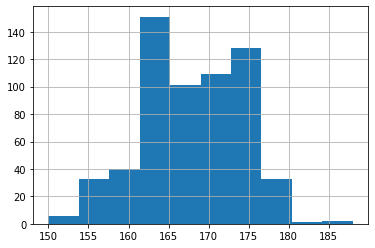

In [89]:
df_playboy['Height'].hist()

array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Height'}>]], dtype=object)

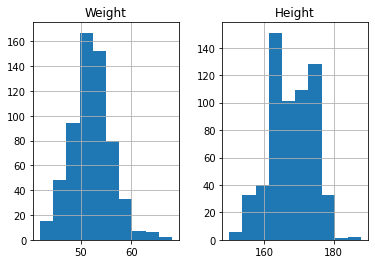

In [90]:
df_playboy[['Weight', 'Height']].hist()

Можно построить несколько гистограмм на одном поле:

<AxesSubplot:ylabel='Frequency'>

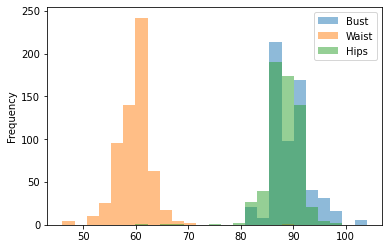

In [93]:
df_playboy[['Bust', 'Waist', 'Hips']].plot.hist(alpha=0.5, bins=25)

Можно построить матрицу диаграмм рассеяния, воспользовавшись подмодулем ```plotting``` и ```функцией scatter_matrix()```.

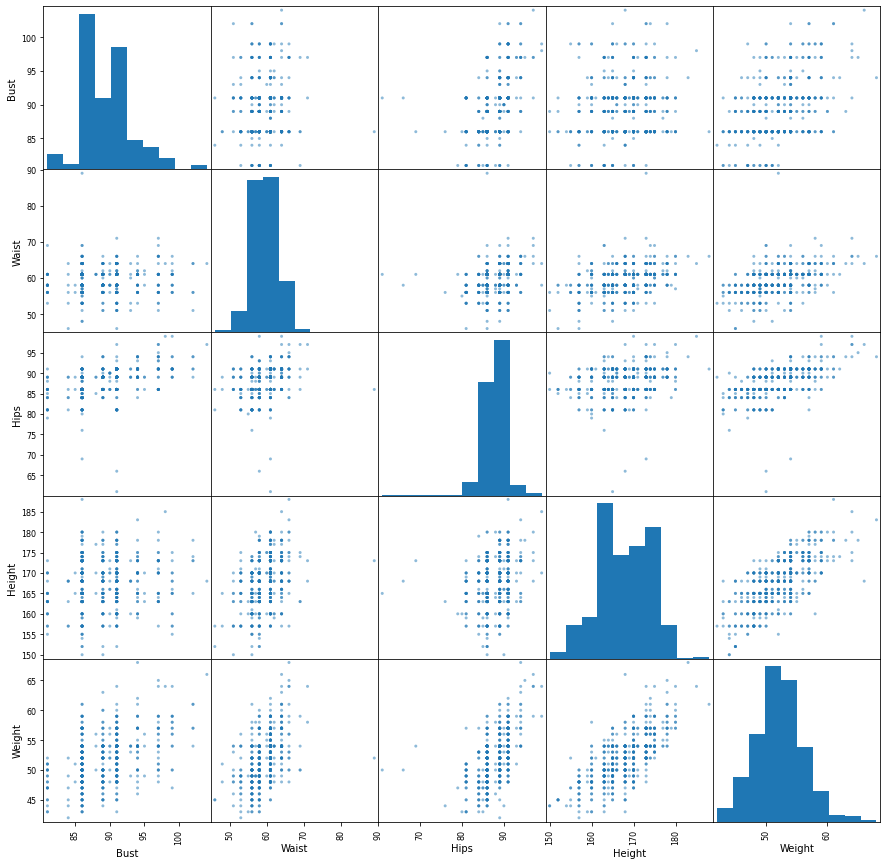

In [94]:
_ = pd.plotting.scatter_matrix(df_playboy[['Bust', 'Waist', 'Hips', 'Height', 'Weight']], 
                  figsize=(15, 15))

__ПРАКТИКА__

Есть предположение, что с середины 80-х годов моделями были в основвном высокие и очень высокие девушки. Постройте с помощью функции plot график зависимости роста модели от года. 

_ПОДСКАЗКА_: сгруппируйте датасет по признаку "год" ("Year") и возьмите средний рост (признак "Height") модели.

Пример анализа данных на этом датасете: решение задачи поиска аномалий, в статье Ю. Кашницкого на "Хабре": https://habr.com/ru/post/251225/

<AxesSubplot:xlabel='Year'>

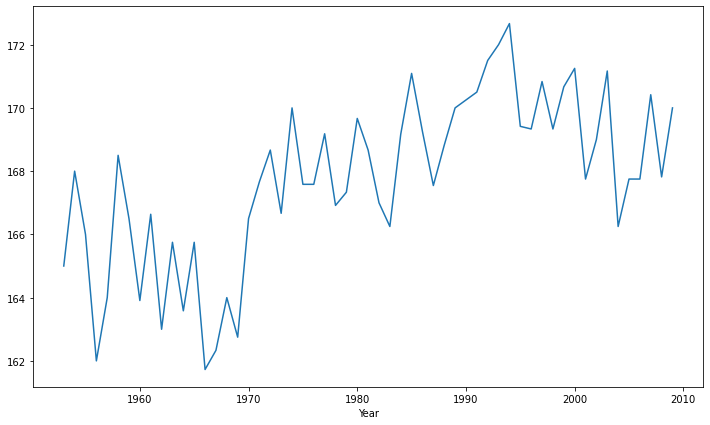

In [102]:
# ваш код здесь
avg_height = df_playboy.groupby('Year')['Height'].mean()
avg_height
avg_height.plot(figsize=(12,7))



[1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2100]


<AxesSubplot:xlabel='year_5'>

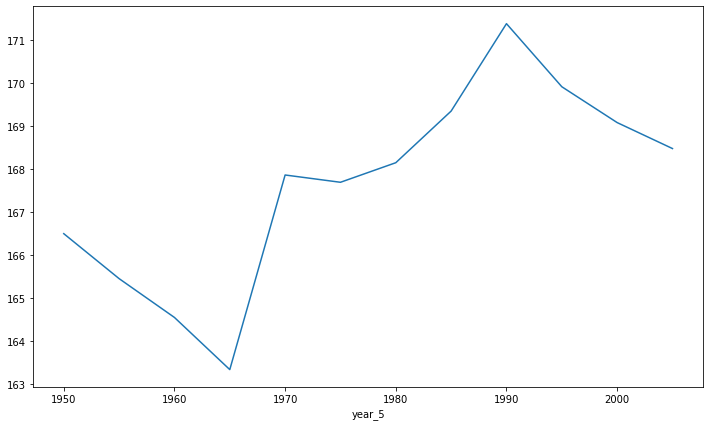

In [113]:
bins = [1950] + list(range(1955, 2010, 5)) + [2100]
print(bins)
labels = bins[:-1]
df_playboy['year_5'] = pd.cut(df_playboy['Year'], bins, labels=labels, right=False) 
df_playboy.groupby('year_5')['Height'].mean().plot(figsize=(12,7))


In [115]:
df_playboy.groupby( pd.cut(df_playboy['Year'], bins, labels=labels, right=False) )['Height'].mean()

Year
1950    166.500000
1955    165.454545
1960    164.551724
1965    163.338983
1970    167.864407
1975    167.694915
1980    168.150000
1985    169.350877
1990    171.383333
1995    169.916667
2000    169.083333
2005    168.479167
Name: Height, dtype: float64

### Сохранение данных

Для сохранения датасетов в требуемом виде можно использовать следующие функции:
 - ```to_csv()``` - для сохранения данных в виде CSV
 - ```to_excel()``` - для сохранения данных в виде Excel Workbook \
...а также во можестве других форматов (см. документацию).
 
Также данные можно экспортировать в структуры Python и numpy:
 - ```to_dict()``` - этот метод вернет словарь с содержимым DataFrame, ровно в том же виде, чтобы из него можно было бы создать новый DataFrame
 - ```to_dict('records')``` - в данном случае этот метод вернет список словарей
 - ```to_numpy()``` - а этот метод можно использовать, если вам нужна матрица numpy

__ПРАКТИКА__

В преобразованном dataset'е ```df_toy_budget``` (см. предыдущее задание из блока "раскатывание"/"штабелирование") подсчитайте суммы по каждому месяцу и запишите их в файл ```toy_budget_monthly.xlsx```.

In [119]:
# ваш код здесь
df_melted = df_toy_budget_melted_

In [125]:
df_melted

Month                            apr      may      jun      jul      aug  \
Div     Account      Type                                                  
Adm     Office Adm   Cost      88.94    88.94    88.94    88.94    88.94   
Air     Gross Margin Income   717.22   929.95  1200.08  1015.15   569.00   
Finance Accounting   Cost      78.89    78.89    78.89    78.89    78.89   
        Billing      Cost      55.81    55.81    55.81    55.81    55.81   
IT      IT Support   Cost      62.27    62.27    62.27    62.27    62.27   
        System Costs Cost     364.68   364.68   364.68   364.68   364.68   
Rail    Gross Margin Income   886.51   666.54   938.16   632.47  1129.63   
Sea     Gross Margin Income  1198.25   876.10  1048.47   770.94  1116.17   
Truck   Gross Margin Income   674.30  1180.82   953.61   754.65  1048.67   

Month                            sep      oct     nov      dec      jan  \
Div     Account      Type                                                 
Adm     Office Adm   Cost      88.94    88.94   88.94   152.94    88.94   
Air     Gross Margin Income  1098.88  1029.48  901.10   717.91   338.71   
Finance Accounting   Cost      78.89    78.89   78.89   142.89    78.89   
        Billing      Cost      55.81    55.81   55.81   119.81    55.81   
IT      IT Support   Cost      62.27    62.27   62.27   126.27    62.27   
        System Costs Cost     364.68   364.68  364.68   364.68   364.68   
Rail    Gross Margin Income   972.84  1195.15  849.66  1028.42   773.51   
Sea     Gross Margin Income   458.94   860.30  591.58   993.72  1104.87   
Truck   Gross Margin Income  1132.72  1172.73  613.59   819.19  1208.87   

Month                            feb      mar  
Div     Account      Type                      
Adm     Office Adm   Cost      88.94    88.94  
Air     Gross Margin Income  1309.62  1055.67  
Finance Accounting   Cost      78.89    78.89  
        Billing      Cost      55.81    55.81  
IT      IT Support   Cost      62.27    62.27  
        System Costs Cost     364.68   364.68  
Rail    Gross Margin Income   689.03   919.21  
Sea     Gross Margin Income   996.27   783.35  
Truck   Gross Margin Income  1007.50   931.48

In [131]:
ix = pd.MultiIndex.from_arrays([['',],[''], ['Sum']], names=['Div', 'Account','Type'])
df_sums = df_toy_budget.groupby('Month').sum().T.set_index(ix)
df_full_monthly = df_melted.append(df_sums)

In [132]:
df_full_monthly

Month                            apr      may      jun      jul      aug  \
Div     Account      Type                                                  
Adm     Office Adm   Cost      88.94    88.94    88.94    88.94    88.94   
Air     Gross Margin Income   717.22   929.95  1200.08  1015.15   569.00   
Finance Accounting   Cost      78.89    78.89    78.89    78.89    78.89   
        Billing      Cost      55.81    55.81    55.81    55.81    55.81   
IT      IT Support   Cost      62.27    62.27    62.27    62.27    62.27   
        System Costs Cost     364.68   364.68   364.68   364.68   364.68   
Rail    Gross Margin Income   886.51   666.54   938.16   632.47  1129.63   
Sea     Gross Margin Income  1198.25   876.10  1048.47   770.94  1116.17   
Truck   Gross Margin Income   674.30  1180.82   953.61   754.65  1048.67   
                     Sum     4126.87  4304.00  4790.91  3823.80  4514.06   

Month                            sep      oct      nov      dec      jan  \
Div     Account      Type                                                  
Adm     Office Adm   Cost      88.94    88.94    88.94   152.94    88.94   
Air     Gross Margin Income  1098.88  1029.48   901.10   717.91   338.71   
Finance Accounting   Cost      78.89    78.89    78.89   142.89    78.89   
        Billing      Cost      55.81    55.81    55.81   119.81    55.81   
IT      IT Support   Cost      62.27    62.27    62.27   126.27    62.27   
        System Costs Cost     364.68   364.68   364.68   364.68   364.68   
Rail    Gross Margin Income   972.84  1195.15   849.66  1028.42   773.51   
Sea     Gross Margin Income   458.94   860.30   591.58   993.72  1104.87   
Truck   Gross Margin Income  1132.72  1172.73   613.59   819.19  1208.87   
                     Sum     4313.97  4908.25  3606.52  4465.83  4076.55   

Month                            feb      mar  
Div     Account      Type                      
Adm     Office Adm   Cost      88.94    88.94  
Air     Gross Margin Income  1309.62  1055.67  
Finance Accounting   Cost      78.89    78.89  
        Billing      Cost      55.81    55.81  
IT      IT Support   Cost      62.27    62.27  
        System Costs Cost     364.68   364.68  
Rail    Gross Margin Income   689.03   919.21  
Sea     Gross Margin Income   996.27   783.35  
Truck   Gross Margin Income  1007.50   931.48  
                     Sum     4653.01  4340.30

In [133]:
df_full_monthly.to_excel('data/toy_budget_monthly.xlsx', engine='openpyxl')